Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **35 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nahom"
COLLABORATORS = ""

---

# CS110 Pre-class Work - The rod-cutting problem

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length $n$ of a rodand, a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1 [time estimate: 5 minutes] 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [1]:
import math
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    q : float
        The optimal revenue
        
    """
    if n==0:    #base case 
        return 0
    q = -math.inf
    for i in range(1,n+1):
        q = max(q, p[i-1]+ cut_rod(p,n-i))
    return q
    
    #raise NotImplementedError()
    

In [2]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2 [time estimate: 10 minutes]

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [25]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    r : list of floats
        The maximum revenues. r[i] gives the maximum revenue for a rod
        of length i. As such:
        
            >>> r[0] = 0
            >>> len(r) == n + 1
            
    s : list of ints
        The optimal sizes of the first piece to cut off. Also make sure 
        that:
            
            >>> s[0] = 0
            >>> len(s) == n + 1
            
    """
    cache=[0 for _ in range(n+1)]
    first_piece_size=[0 for _ in range (n+1)]
    cache[0]=0
    for j in range(1,n+1):
        q=-math.inf
        for i in range(1,j+1):
            if q < p[i-1]+cache[j-i]:
                q = p[i-1]+cache[j-i]
                first_piece_size[j]=i
        cache[j]=q
    return (cache, first_piece_size)
    #raise NotImplementedError()

In [34]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the revenue 
        (in USD, for example) the company earns selling a rod of length i+1
    n : int
        Length of the rod
    
    Returns
    -------
    sol : a list of ints
        Indicates how to cut the rod. Cutting the rod with the lengths
        given in sol gives the optimal revenue.
        
            >>> print_cut_rod_solution(p,0) == []
            
    """
    r,s = extended_bottom_up_cut_rod(p,n)
    print("The rod will be cut as follows:")
    while n>0:
        print(s[n])
        n=n-s[n]
    #raise NotImplementedError()


In [35]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1 [time estimate: 1 minute]

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for questions 2 and 3 below.


In [28]:
import numpy as np
def generate_price_list(n):
    """
    Generates a price list of length n
    
    Parameters
    ----------
    n : int
        Length of the list, must be positive
    
    Returns
    -------
    p : list
        The ordered price list for each rod cut
        
    """
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p
P = generate_price_list(20)

## Question 2 [time estimate: 5 minutes]

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


Text(0.5, 1.0, 'Time Taken to Run cut_rod on Different Rod Lengths')

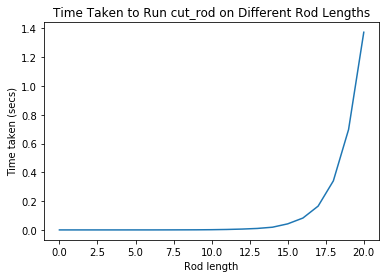

In [45]:
import time
    #Create a list to store the different rod lengths
rod_lengths= [n for n in range(21)]
    
    #Create a list to store the time it takes to run cut_rod on the rod lengths above
time_list=[]
for n in rod_lengths:
    avg_time=0
    for i in range(20):
        start= time.time()
        cut_rod(P,n)
        avg_time += time.time() - start
    time_list.append(avg_time/20)

import matplotlib.pyplot as plt
#Plot Time taken Against Rod Lengths
plt.plot(rod_lengths,time_list)
plt.xlabel('Rod length', fontsize=10)
plt.ylabel('Time taken (secs)', fontsize=10)
plt.title('Time Taken to Run cut_rod on Different Rod Lengths')

## Question 3 [time estimate: 2 minutes]

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

Text(0.5, 1.0, 'Time Taken to Run extended_bottom_up_cut_rod on Different Rod Lengths')

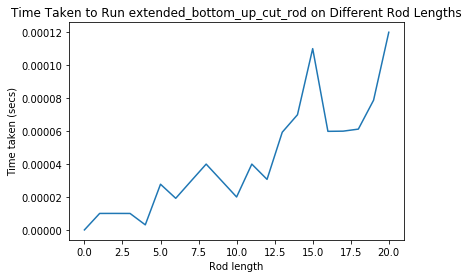

In [46]:
#Create a list to store the time it takes to run cut_rod on the rod lengths above
time_list2=[]
for n in rod_lengths:
    avg_time=0
    for i in range(100):
        start= time.time()
        extended_bottom_up_cut_rod(P,n)
        avg_time += time.time() - start
    time_list2.append(avg_time/100)
plt.plot(rod_lengths,time_list2)
plt.xlabel('Rod length', fontsize=10)
plt.ylabel('Time taken (secs)', fontsize=10)
plt.title('Time Taken to Run extended_bottom_up_cut_rod on Different Rod Lengths')

## Question 4 [time estimate: 2 minutes]

Contrast both curves. What can you conclude?

From the graph above we see that the cut_rod algorithm takes a much longer time than the extended_bottom_up_cut_rod. Inspecting it clearly, it appears to be increasing almost exponentially (as we would aspect due to recursive nature of the algorithm). This is consistent with what we would expect theoretically as the time complexity for cut_rod and extended_bottom_up_cut_rod are $\\theta(2^n)$ and $\\theta(n^2)$ respectively

## Part C - After completing your experiments above, answer the following questions:

## Question 1 [time estimate: 5 minutes]
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

Cormen et. al mentioned that at $n=40$, the running time would likely be almost an hour and after that it would double each time n is increased by 1.
We can generalize this observation in the formula below:

$T(n+k)=$ $T(n) * 2^k$
Where n will be set to $40$, and k represents the additional length after $40$.
1 million years is $8.76 * 10^9$ hours
Substituting this into the equation, we get:
$T(40+k)=$ $1 * 8.76 * 10^9$
$8.76 * 10^9=2^k$

$k=log_2(8.76 * 10^9)≈33$
We would get the running time to be approximately a million years if $k=33$, which means that our length would be $n+k=40+33=73$

## Question 2 [time estimate: 5 minutes]
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

For the extended_bottom_up_cut_rod algorithm, it takes 0.00034711122512817385 seconds to run for a rod length of 73

## [Optional]  Question 3 [time estimate: 5 minutes]
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE